<a href="https://colab.research.google.com/github/Anuj123verma/Computer-Vision/blob/main/2017026_Lec2_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assumptions That We Should Take When Implementing **Algorithm** 


In [ ]:
def finding_foreground(img_path,threshold_value):
  im = cv2.imread(img_path)
  im = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

  c_th_gr=0
  c_th_le=0
  n=im.shape[0]
  m=im.shape[1]
  p1= n//2-20
  p2= m//2-20
  p3= n//2+20
  p4= m//2+20
  # Assumption 1
  # finding for the centre pixel values greater than threshold and less than threshold
  for i in range(p1,p3):
    for j in range(p2,p4):
      if(im[i][j]>threshold_value):
        c_th_gr+=1
      else:
        c_th_le+=1
    

    # Assumption 2
    back_gr = 0
    back_le = 0
    # check for corner sides
    #  top 5 rows
    for i in range(0,5):
        for j in range(m):
            if (im[i][j]>threshold_value ):
                back_gr+=1
            else:
                back_le+=1
    # bottom 5 rows  
    for i in range(n-6, n):
        for j in range(m):
            if ( im[i][j] > threshold_value ):
                back_gr += 1
            else:
                back_le +=1
    # left 5 colums 
    for i in range(n):
        for j in range(0, 5):
            if ( im[i][j] > threshold_value ):
                back_gr += 1
            else:
                back_le +=1
    # right 5 colums
    for i in range(n):
        for j in range(m- 6, m):
            if ( im[i][j] > threshold_value ):
                back_gr += 1
            else:
                back_le +=1

    #  if majority of the background pixcels have values greater than the threshold value
    #  then the background will become the pixcels that have values greater than threshold value
    if ( back_gr > back_le ):
        return "smaller"
    elif ( back_gr == back_le ):

        # if majority of the center elemets have pixel values grreater than theshold value 
        #  then foreground will become the become values that has value greater than threshold value
        if (center_gr > center_le):
            "greater"
        else:
            "smaller"
    else:
        "greater"
  

# so with the following two assumptions we can conclude our algorithm

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2
from skimage.color import rgb2gray


In [ ]:
image = Image.open('/content/dog-1020790_960_720.jpg')

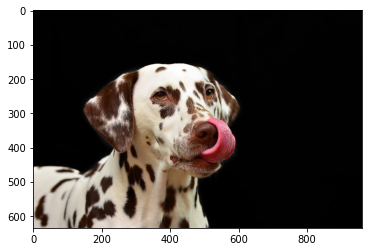

In [ ]:
plt.imshow(image)

In [ ]:
img_gray = image.convert("L")

In [ ]:
img_gray_1 = np.asarray(img_gray)

In [ ]:
#my main otsu algorithm

def otsu(gray):
    number_of_pixels = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/number_of_pixels
    his, bins = np.histogram(gray, np.array(range(0, 256)))
    plt.plot(his)
    plt.show()
    final_thresh = -1
    final_value = -1
    for t in bins[1:-1]: 
        Wb = np.sum(his[:t]) * mean_weigth #for weighted mean of part first
        Wf = np.sum(his[t:]) * mean_weigth #for weighted mean of part second
        v0 = np.var(his[0:t])
        v1 = np.var(his[t:])
        value = Wb*v0+Wf*v1
        if value > final_value:
            final_thresh = t
            final_value = value
    img = gray.copy()
    print(final_thresh)
    value1 = finding_foreground('/content/dog-1020790_960_720.jpg', final_thresh)
    print(value1)
    # applying my assumptioms here for segregating the foreground and background
    if (value1):
        img[gray> final_thresh] = 255
        img[gray< final_thresh] = 0
    else:
        img[gray< final_thresh] = 255
        img[gray> final_thresh] = 0
    # img[gray > final_thresh] = 255
    # img[gray < final_thresh] = 0
    return img

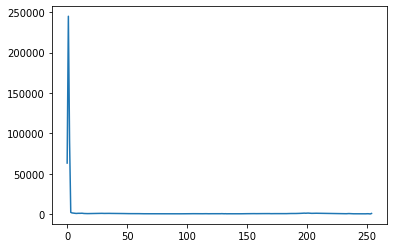

4
smaller


In [ ]:
res = otsu(img_gray_1)

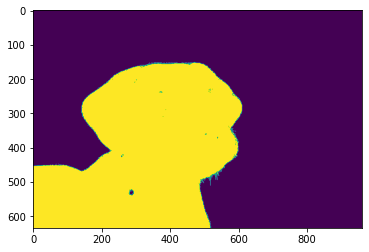

In [ ]:
plt.imshow(res)

In [ ]:
im = cv2.imread('/content/dog-1020790_960_720.jpg')

In [ ]:
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [ ]:
result = img.copy()
result[res!=255] = (0,0,255)

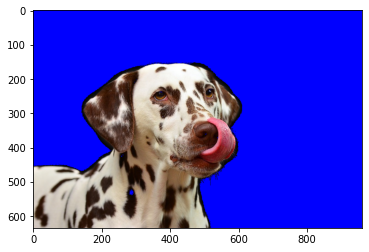

In [ ]:
plt.imshow(result)